In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
train=pd.read_csv("/kaggle/input/ai-201-b-mse-2-aiml-c/train.csv")
test=pd.read_csv("/kaggle/input/ai-201-b-mse-2-aiml-c/test.csv")

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18306 entries, 0 to 18305
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          17071 non-null  object 
 1   Age                             16495 non-null  float64
 2   Height                          16702 non-null  float64
 3   Weight                          16838 non-null  float64
 4   family_history_with_overweight  17241 non-null  object 
 5   FAVC                            17257 non-null  object 
 6   FCVC                            17331 non-null  float64
 7   NCP                             16586 non-null  float64
 8   CAEC                            16841 non-null  object 
 9   SMOKE                           16759 non-null  object 
 10  CH2O                            17373 non-null  float64
 11  SCC                             16503 non-null  object 
 12  FAF                             

In [6]:
train.head(10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,33.226808,1.766888,83.337721,yes,NaN,2.000000,NaN,Sometimes,no,1.964435,no,0.750111,0.00000,no,Automobile,Overweight_Level_II
1,Female,18.000000,1.600000,55.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,1.000000,1.00000,Sometimes,Public_Transportation,Normal_Weight
2,NaN,26.000000,1.640741,111.930700,yes,yes,3.000000,3.000000,Sometimes,no,2.617988,no,0.000000,NaN,Sometimes,Public_Transportation,Obesity_Type_III
3,Male,19.000000,1.690000,64.000000,no,yes,2.000000,NaN,Frequently,no,2.000000,no,0.000000,1.00000,Sometimes,Automobile,Normal_Weight
4,Male,NaN,1.606474,94.189167,yes,yes,2.000000,2.812283,Sometimes,no,2.000000,no,1.000000,0.00000,no,NaN,Obesity_Type_I
5,NaN,21.000000,1.720000,68.000000,yes,yes,1.000000,1.000000,Frequently,no,2.000000,no,1.000000,1.00000,Sometimes,Public_Transportation,Normal_Weight
6,Male,23.329344,NaN,95.290429,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,3.000000,2.00000,Sometimes,Public_Transportation,Obesity_Type_I
7,Male,25.472995,NaN,88.633616,yes,yes,1.846452,1.001633,Sometimes,no,2.000000,no,0.038809,0.37465,Sometimes,Public_Transportation,Overweight_Level_II
8,Male,17.451085,1.787379,59.612717,yes,yes,3.000000,3.762778,Sometimes,NaN,2.000000,no,1.000000,NaN,Sometimes,Automobile,Insufficient_Weight
9,NaN,18.000000,1.780000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,NaN,1.000000,1.00000,no,Public_Transportation,Normal_Weight


In [7]:
train.isnull().sum()

Gender                            1235
Age                               1811
Height                            1604
Weight                            1468
family_history_with_overweight    1065
FAVC                              1049
FCVC                               975
NCP                               1720
CAEC                              1465
SMOKE                             1547
CH2O                               933
SCC                               1803
FAF                               1724
TUE                               1120
CALC                              1090
MTRANS                            1089
NObeyesdad                           0
dtype: int64

In [8]:
test.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

In [9]:
test_id=test['id']
test=test.drop(columns=['id'])

In [10]:
X=train.drop(columns=['NObeyesdad'])
y=train['NObeyesdad']

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
numeric_feature=X.select_dtypes(include=['int64','float64']).columns
categorical_features=X.select_dtypes(include=['object']).columns

In [13]:
numeric_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

In [14]:
categorical_pipeline=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('scaler',OneHotEncoder(handle_unknown='ignore'))
])

In [15]:
preprocessor=ColumnTransformer(transformers=[
    ('num',numeric_pipeline,numeric_feature),
    ('cat',categorical_pipeline,categorical_features)
])

In [16]:
model=GradientBoostingClassifier(
    n_estimators=920,        # number of trees
    learning_rate=0.025,      # smaller learning rate usually better
    max_depth=4,             # depth of each tree
    subsample=0.7,           # fraction of samples for each tree
    min_samples_split=5,     # minimum samples to split a node
    min_samples_leaf=2,      # minimum samples in a leaf
    max_features='sqrt',     # number of features to consider for best split
    random_state=42
)

In [17]:
pipeline=Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',model)
])

In [18]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object'))])),
                ('model',
                 GradientBoostingClassifier(learning_rate=0.025, max_depth=4,
                                            max_features='sqrt',
                                            min_samples_leaf=2,
                                            min_samples_split=5,
                                            n_estimators=920, random_state=42,
                                            subsample=0.7))])

In [19]:
y_pred=pipeline.predict(X_test)

In [20]:
accu=accuracy_score(y_pred,y_test)

In [21]:
print(accu)

0.8806663025669034


In [22]:
y_final=pipeline.predict(test)

In [23]:
print(y)

0        Overweight_Level_II
1              Normal_Weight
2           Obesity_Type_III
3              Normal_Weight
4             Obesity_Type_I
                ...         
18301       Obesity_Type_III
18302        Obesity_Type_II
18303    Insufficient_Weight
18304    Insufficient_Weight
18305     Overweight_Level_I
Name: NObeyesdad, Length: 18306, dtype: object


In [24]:
print(y_final)

['Obesity_Type_III' 'Overweight_Level_II' 'Obesity_Type_I' ...
 'Obesity_Type_I' 'Overweight_Level_I' 'Overweight_Level_II']


In [25]:
submission = pd.DataFrame({
    'id': test_id,
    'NObeyesdad': y_final
})

In [26]:
submission.to_csv('Predictions.csv', index=False)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

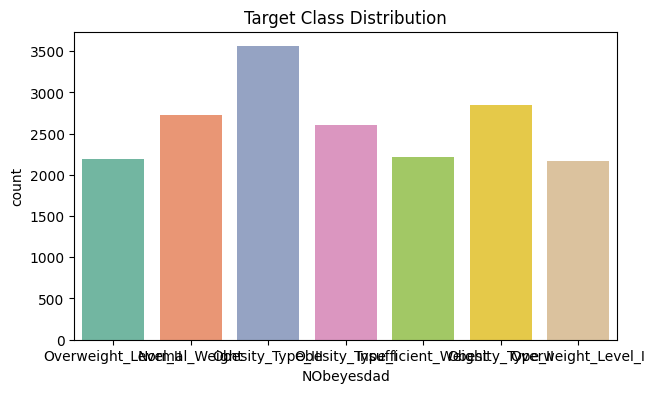

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,4))
sns.countplot(data=train, x=y, palette="Set2")
plt.title("Target Class Distribution")
plt.xlabel(y)
plt.ylabel("Count")
plt.show()


In [29]:
num_cols = df.select_dtypes(include=[np.number]).columns

df[num_cols].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions", fontsize=14)
plt.show()


NameError: name 'df' is not defined

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()
